In [1]:
import numpy as np

In [2]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [4]:
  #load model
model=tf.keras.models.load_model('./models/object_detection.h5')
print('model loaded sucessfully')

model loaded sucessfully


In [5]:
path='./test_images/N2.jpeg'
image=load_img(path)
image=np.array(image,dtype=np.uint8)
image1=load_img(path,target_size=(224,224))
image_arr_224=img_to_array(image1)/255.0#convert into array and get normalized data

In [6]:
#front size of original image
h,w,d=image.shape
print('Height of the image is = ',h)
print('Width of the image is = ',w)

Height of the image is =  2340
Width of the image is =  3112


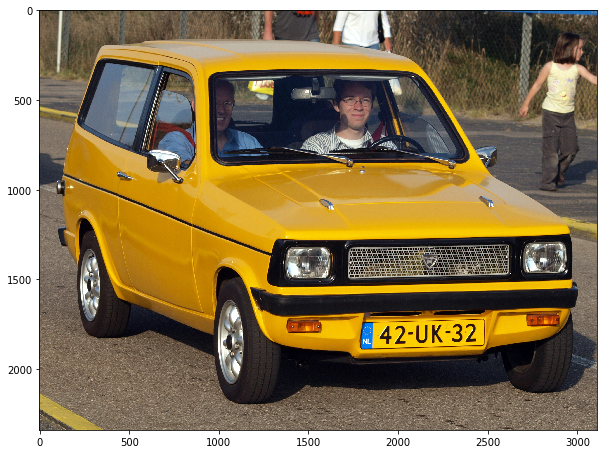

In [7]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [8]:
image_arr_224.shape

(224, 224, 3)

In [9]:
test_arr=image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [10]:
coords=model.predict(test_arr)
coords

array([[0.5889392 , 0.8043606 , 0.74653643, 0.8150435 ]], dtype=float32)

In [11]:
#denormaize

In [12]:
denorm=np.array([w,w,h,h])
coords=coords*denorm
coords

array([[1832.778759  , 2503.17027473, 1746.89525485, 1907.20181108]])

In [13]:
coords=coords.astype(np.int32)

In [14]:
coords

array([[1832, 2503, 1746, 1907]])

In [15]:
#drawing bounding box

(1832, 1746) (2503, 1907)


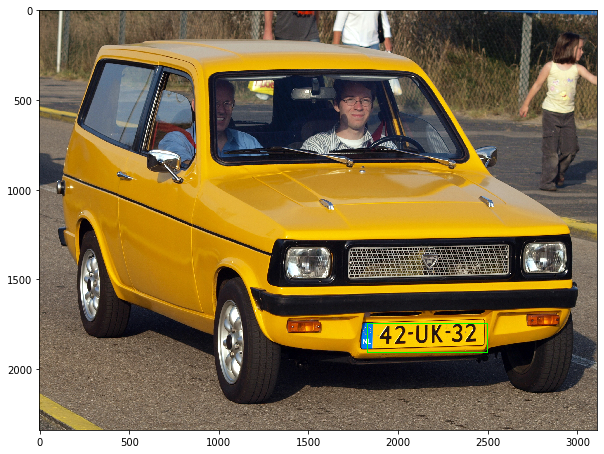

In [16]:
xmin,xmax,ymin,ymax=coords[0]
pt1=(xmin,ymin)
pt2=(xmax,ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [17]:
#create pipeline
path='./test_images/N2.jpeg'
def object_detection(path):
    #read image
    image=load_img(path)
    image=np.array(image,dtype=np.uint8)
    image1=load_img(path,target_size=(224,224))
    #data preprocessing
    image_arr_224=img_to_array(image1)/255.0#convert into array and get normalized data
    h,w,d=image.shape
    test_arr=image_arr_224.reshape(1,224,224,3)
    coords=model.predict(test_arr)
    denorm=np.array([w,w,h,h])
    coords=coords*denorm
    coords=coords.astype(np.int32)
    
    xmin,xmax,ymin,ymax=coords[0]
    pt1=(xmin,ymin)
    pt2=(xmax,ymax)
    print(pt1,pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image,coords

(1832, 1746) (2503, 1907)


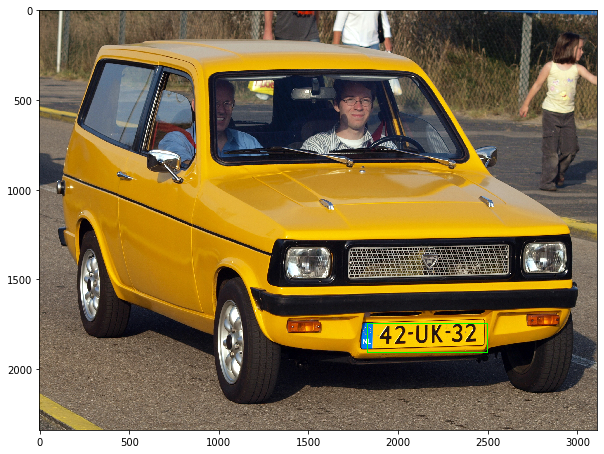

In [18]:
path='./test_images/N2.jpeg'
image, cods=object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

(131, 130) (189, 144)


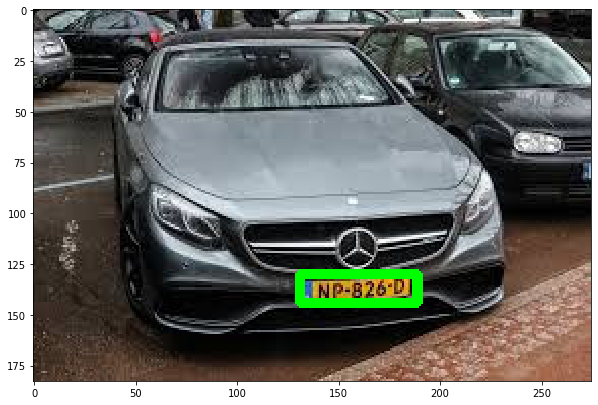

In [19]:
path='./test_images/N11.jpeg'
image, cods=object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# OBJECT CHARACTER RECOGNITION - OCR

In [41]:
import pytesseract as pt

(1832, 1746) (2503, 1907)


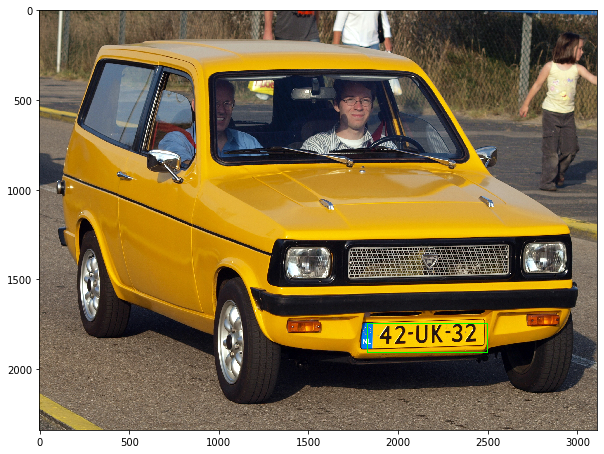

In [42]:
path='./test_images/N2.jpeg'
image, cods=object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

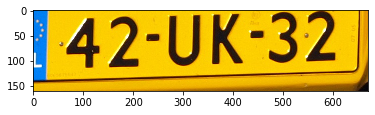

In [44]:
plt.imshow(roi)
plt.show()

In [36]:
from pytesseract import image_to_string

In [47]:
#extract text from image
text=pt.image_to_string(roi, lang='eng', config='--psm 6')
print(text)

42-UK-32

